In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

In [152]:
%run functions.py

In [153]:
df = pd.read_csv('../data/train_clean.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [154]:
df.head()

,ms_zoning,lot_area,condition_1,overall_qual,overall_cond,year_built,year_remod/add,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_unf_sf,total_bsmt_sf,central_air,1st_flr_sf,gr_liv_area,full_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,fireplaces,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,yr_sold,age,quality,remod,bsmt_rating,bsmt_sf,saleprice
0,1,13517,6,6,8,1976,2005,4,3,3,3,192.0,725.0,1,725,1479,2,3,1,4,0,2.0,475.0,3,3,1,2010,34,576,5,9,533.0,130500
1,1,11492,1,7,5,1996,1997,4,3,4,3,276.0,913.0,1,913,2122,2,4,1,4,1,2.0,559.0,3,3,1,2009,13,420,12,12,637.0,220000
2,1,7922,1,5,7,1953,2007,3,4,3,3,326.0,1057.0,1,1057,1057,1,3,1,4,0,1.0,246.0,3,3,1,2010,57,420,3,9,731.0,109000
3,1,9802,1,5,5,2006,2007,3,3,4,3,384.0,384.0,1,744,1444,2,3,1,3,0,2.0,400.0,3,3,1,2010,4,225,3,12,0.0,174000
4,1,14235,1,6,8,1900,1993,3,3,2,4,676.0,676.0,1,831,1445,2,3,1,3,0,2.0,484.0,3,3,0,2010,110,432,17,8,0.0,138500


In [155]:
df.shape

(1880, 33)

In [156]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [157]:
df.dtypes[df.dtypes.values == 'object']

Series([], dtype: object)

In [158]:
features = df.columns.drop('saleprice')

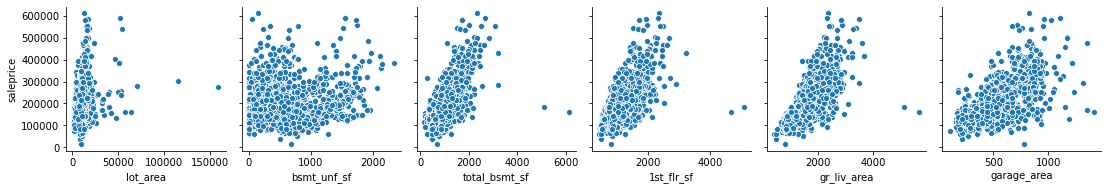

In [170]:
sns.pairplot(df, 
             x_vars=['lot_area', 'bsmt_unf_sf', 
                         'total_bsmt_sf', '1st_flr_sf', 
                         'gr_liv_area', 'garage_area'],
             y_vars = 'saleprice');
plt.savefig('../images/pairplot2.jpg')

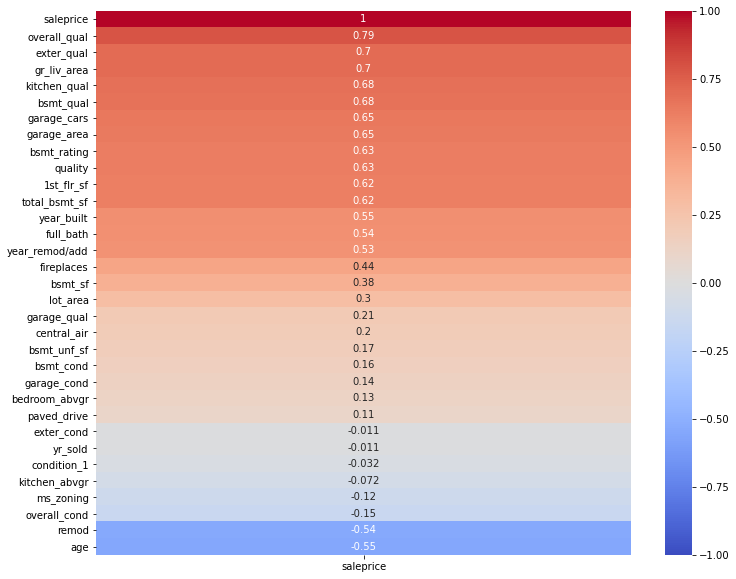

In [160]:
plt.figure (figsize=(12,10))
sns.heatmap(df.corr()[['saleprice']].sort_values('saleprice', ascending=False),
            vmax=1, vmin=-1, cmap='coolwarm', annot=True);
plt.savefig('../images/corr_sale_price.jpg', transparent=True)

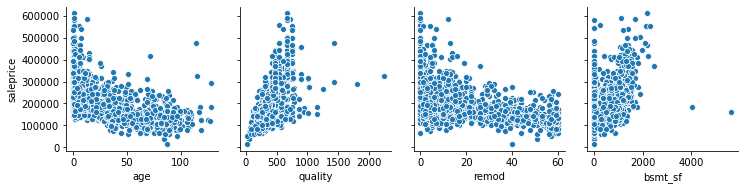

In [169]:
sns.pairplot(df, 
             x_vars=['age', 'quality', 'remod', 'bsmt_sf'],
             y_vars = 'saleprice');
plt.savefig('../images/pairplot1.jpg')

I used this source to learn more about the best way to select features for a model  
[Towards Data Science](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)

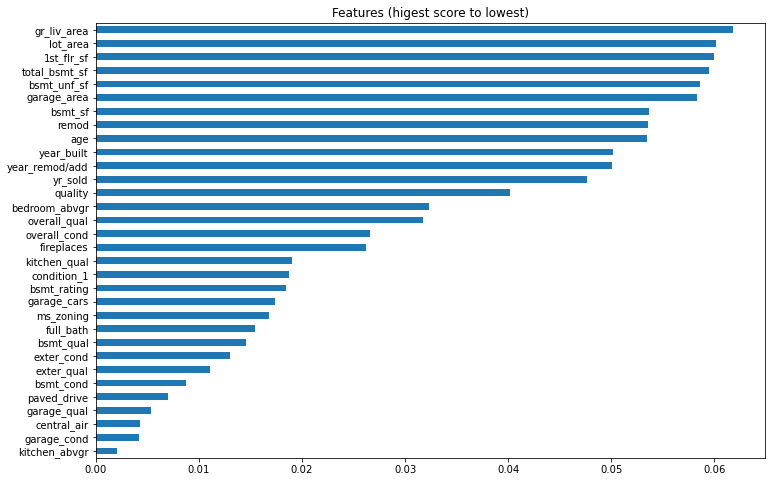

In [162]:
X = df[features].copy()
y = df['saleprice'].copy()

tree = ExtraTreesClassifier()
tree.fit(X,y)

feat_scores = pd.Series(tree.feature_importances_, index=X.columns)
plt.figure(figsize=(12,8))
plt.title('Features (higest score to lowest)')
feat_scores.sort_values(ascending=True).plot(kind='barh');
plt.savefig('../images/tree.jpg', transparent=True)

In [163]:
X = df[features].copy()
y = df['saleprice'].copy()

maybe = SelectKBest(score_func=chi2, k=10)

fit = maybe.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['Feature', 'Score']
feature_scores.nlargest(20, 'Score')

,Feature,Score
1,lot_area,4.175257e+06
31,bsmt_sf,4.647995e+05
11,bsmt_unf_sf,3.151279e+05
15,gr_liv_area,2.167612e+05
12,total_bsmt_sf,1.955556e+05
14,1st_flr_sf,1.669540e+05
22,garage_area,8.889108e+04
28,quality,7.671402e+04
27,age,3.079087e+04
29,remod,2.148500e+04


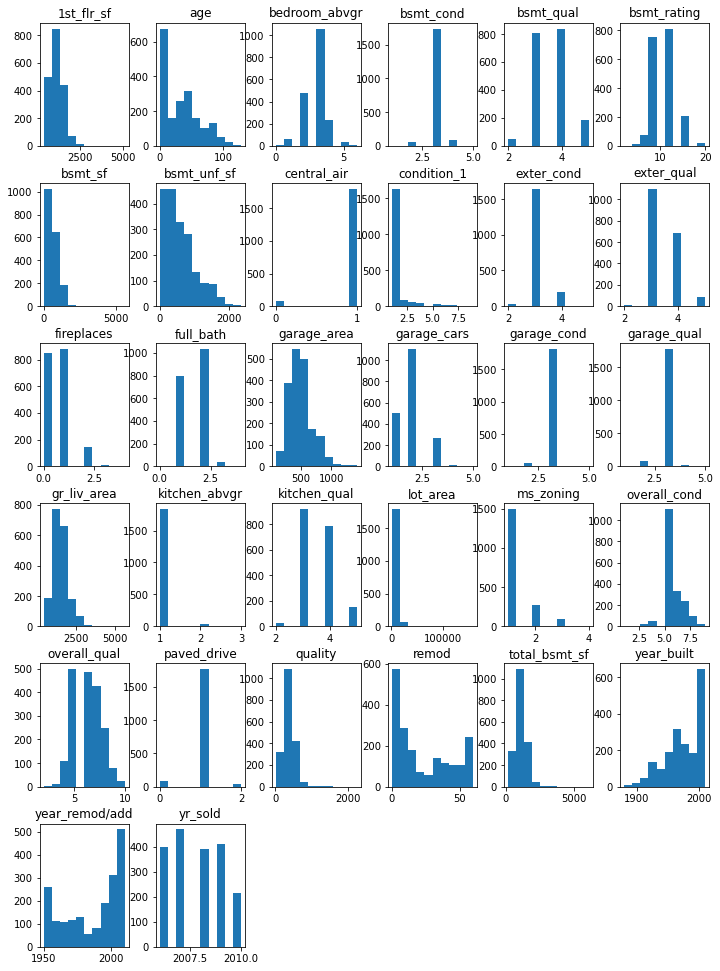

In [164]:
df[features].hist(grid=False, figsize=(12,17));

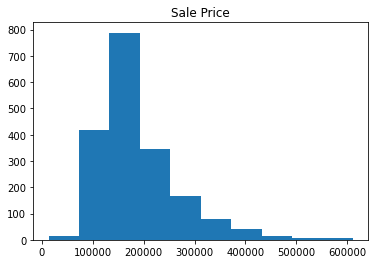

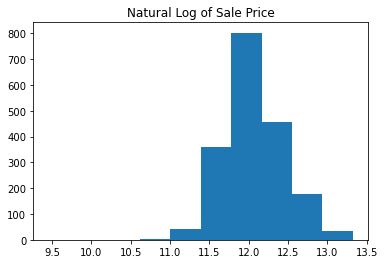

In [165]:
plt.figure()
ax = plt.hist(df['saleprice'])
plt.title('Sale Price')
plt.savefig('../images/sale_price_dist.jpg', transparent=True)
plt.figure()
plt.hist(df['saleprice'].map(np.log))
plt.title('Natural Log of Sale Price')
plt.savefig('../images/log_sale_price_dist.jpg', transparent=True);

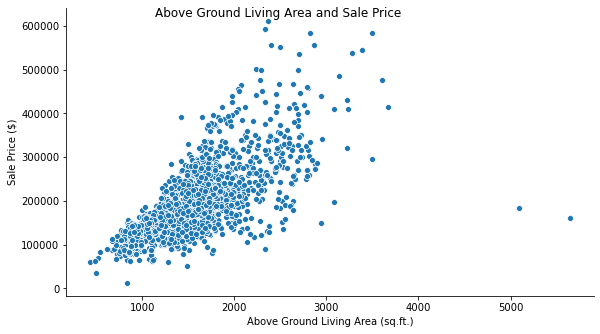

In [194]:
ax = sns.pairplot(df, x_vars = 'gr_liv_area', y_vars='saleprice');
ax.fig.set_size_inches((10,5))
ax.fig.suptitle('Above Ground Living Area and Sale Price')
ax.set(xlabel='Above Ground Living Area (sq.ft.)', ylabel='Sale Price ($)');
plt.savefig('../images/gr_liv_area.jpg')

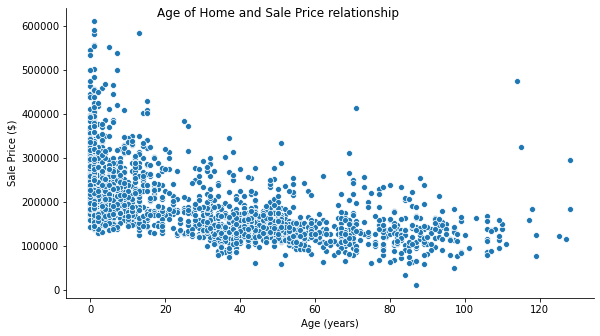

In [195]:
ax = sns.pairplot(df, x_vars = 'age', y_vars='saleprice');
ax.fig.set_size_inches((10,5))
ax.fig.suptitle('Age of Home and Sale Price relationship')
ax.set(xlabel='Age (years)', ylabel='Sale Price ($)');
plt.savefig('../images/age.jpg')

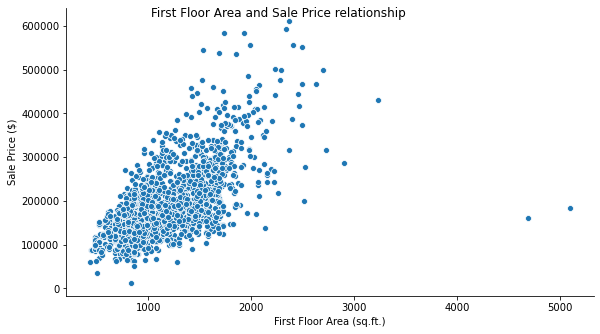

In [196]:
ax = sns.pairplot(df, x_vars = '1st_flr_sf', y_vars='saleprice');
ax.fig.set_size_inches((10,5))
ax.fig.suptitle('First Floor Area and Sale Price relationship')
ax.set(xlabel='First Floor Area (sq.ft.)', ylabel='Sale Price ($)');
plt.savefig('../images/1st_flr_sf.jpg')